In [320]:
import copy
import numpy as np
from scipy.linalg import norm
from scipy import linalg 
import math
from matplotlib import mlab
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt

$$\dfrac{d^2y}{dx^2}+(x+2)\dfrac{dy}{dx}, y(0)=0, y'_x(0)=1$$

Найдем точное решение: $$\dfrac{dy}{dx}=z\Rightarrow z'+(x+2)z=0\Rightarrow  z=exp(-\dfrac{x^2}{2}-2x), z(0)=1$$
$$\Rightarrow y=-\dfrac{e^{(-\frac{x^2}{2}-2x)}}{2(x+1)}+\dfrac{1}{2} $$

Исходное дифференциальное уравнение второго порядка можно свести к системе, 
состоящей из двух дифференциальных уравнений первого порядка при помощи замен $y'=q, q'=y'' \Rightarrow$

$$y'=q$$  

$$ q'=-(x+2)q $$

 ##### Численно решим Методом Рунге-Кутты 2-го порядка

Схема метода: $$k_1^{i} = h\cdot f(x_i, y_i)= h\cdot y'(x_i, y_i) $$ 
$$k_2^{i} = h\cdot f(x_i+h, y_i+k_1^i)$$

$$\Delta y_i = \dfrac{k_1^i+k_2^i}{2} \Rightarrow y_{i+1}=y_i+ \Delta y_i, x_{i+1}=x_i+h$$
    

Для нашего случая $$y_i=y_{i-1}+q_{i-1}\cdot h$$
$$q_i=q_{i-1}+(-x_{i-1}-2)\cdot q_{i-1}\cdot h$$



In [321]:
def F(x):
    y = math.exp(-(x*x)-2*x)*(-0.5)/(x+1)+0.5
    return y

In [322]:
def f_q(x, y):
    f = -(x+2)*y
    return f

In [323]:
def f_y(x):
    f = x
    return f

Для функции $q:$

In [324]:
n = 20
k = [[0] * (2) for i in range(n)]
dq = np.zeros(n)
x = np.zeros(n)
q = np.zeros(n)

h = 0.1
x[0] = 0
q[0] = 1

for i in range(n-1):
    if x[i] <= 1:
        print('x =',round(x[i], 10),', q =',round(q[i], 6),'итерация', i)
        k[i][0] = h * f_q(x[i],q[i])
        k[i][1] = h * f_q(x[i] + h,q[i]+k[i][0])
        dq[i] = 0.5 * (k[i][0] + k[i][1])
        x[i+1] = x[i] + h
        q[i+1] = q[i] + dq[i]

    else: break 


x = 0.0 , q = 1.0 итерация 0
x = 0.1 , q = 0.816 итерация 1
x = 0.2 , q = 0.65941 итерация 2
x = 0.3 , q = 0.527726 итерация 3
x = 0.4 , q = 0.418275 итерация 4
x = 0.5 , q = 0.328346 итерация 5
x = 0.6 , q = 0.255289 итерация 6
x = 0.7 , q = 0.196598 итерация 7
x = 0.8 , q = 0.149965 итерация 8
x = 0.9 , q = 0.113314 итерация 9
x = 1.0 , q = 0.084815 итерация 10


Для функции $y:$

In [325]:
n = 20
k = [[0] * (2) for i in range(n)]
dy = np.zeros(n)
y = np.zeros(n)

h = 0.1
y[0] = 0
for i in range(11):
    print('q =',round(q[i], 4),', y =',round(y[i], 6),'итерация', i)
    k[i][0] = h * f_y(q[i])
    k[i][1] = h * f_y(q[i] + k[i][0])
    dy[i] = 0.5 * (k[i][0] + k[i][1])
    y[i+1] = y[i] + dy[i]


q = 1.0 , y = 0.0 итерация 0
q = 0.816 , y = 0.105 итерация 1
q = 0.6594 , y = 0.19068 итерация 2
q = 0.5277 , y = 0.259918 итерация 3
q = 0.4183 , y = 0.315329 итерация 4
q = 0.3283 , y = 0.359248 итерация 5
q = 0.2553 , y = 0.393724 итерация 6
q = 0.1966 , y = 0.42053 итерация 7
q = 0.15 , y = 0.441173 итерация 8
q = 0.1133 , y = 0.456919 итерация 9
q = 0.0848 , y = 0.468817 итерация 10


Невязка $|[y]_n-y^{(n)}|,$ где $[y]_n-$точное решение, $y^{(n)}$- численное решение метода

In [326]:
for i in range(11):
    print(round(F(x[i])-y[i], 4))

0.0
0.0266
0.041
0.0472
0.0479
0.0453
0.0406
0.035
0.0293
0.0237
0.0187


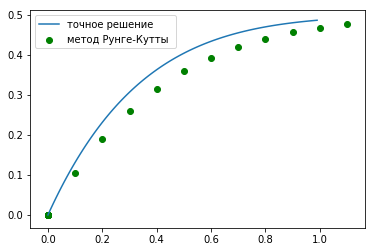

In [327]:

Ox = [x[i] for i in range(10)]
Oy = [y[i] for i in range(10)]
list_x = [0 + i/100 for i in range (0, 100 )]
list_y = [F(list_x[i]) for i in range(0, 100)]
plt.plot(list_x, list_y, label = u'точное решение')
plt.scatter(x, y, c='green',label = u'метод Рунге-Кутты ' )
plt.legend()


plt.show()